# Biased Sampling by Position and Play Types

I'm less interested in the types of plays that lead to the injuries and more interested in the physical parameters associated with the injuries. 

IDEA: The number of samples out of the box is a massive 29,000 non-injury plays compared to 77 injuries, which will be cut down to about 50 when performing the train-test split. 

Since I want to know what Physical parameters are leading to the injuries, I can look at similar plays by filtering for the playtype and position. Keeping fieldtype as a parameter is fine. 

First I need to look at the 

In [28]:
import polars as pl #type: ignore
import os

path = "F:/Data/Processing_data/"
file2 = "Full_Summary_Concussions.parquet"
file3 = "Full_Summary_Injuries.parquet"

df = pl.read_parquet(os.path.join(path, file3))

In [29]:
df.head()

PlayKey,Position,StadiumType,FieldType,Temperature,Weather,PlayType,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,IsInjured,IsSevere,Position_right,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque
str,cat,cat,cat,i16,cat,cat,cat,i8,i8,i8,i8,i8,i8,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
"""26624-1-20""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Rush""","""No_Injury""",0,0,0,0,0,0,"""QB""",12.560955,5.40202,7.158936,178.440002,78.945656,3.712159,0.483114,187.427231,13.7315,38.490417,-0.010563,72.574364,-0.004217
"""26624-1-22""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Pass""","""No_Injury""",0,0,0,0,0,0,"""QB""",27.687366,7.580832,20.106533,179.25,101.294319,4.517752,1.936179,72.198616,17.693897,195.079529,0.01526,136.597397,-0.015356
"""26624-1-23""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Rush""","""No_Injury""",0,0,0,0,0,0,"""QB""",28.736702,8.434956,20.301746,178.229996,78.788918,4.414752,1.037426,240.314255,15.576145,197.972412,0.05488,135.239807,-0.031697
"""26624-1-24""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Unknown""","""No_Injury""",0,0,0,0,0,0,"""QB""",25.678587,3.967429,21.711157,178.919998,89.392487,4.60975,0.850284,94.129692,14.66524,196.742706,0.067654,136.555679,-0.02783
"""26624-1-45""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Pass""","""No_Injury""",0,0,0,0,0,0,"""QB""",24.427948,10.659006,13.768942,179.690002,94.147797,4.019967,0.592911,240.312332,11.786748,195.729614,0.003361,135.342194,-0.00585


In [30]:
injured = df.filter(pl.col("IsInjured")==1)

In [43]:
injured.head()

PlayKey,Position,StadiumType,FieldType,Temperature,Weather,PlayType,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,IsInjured,IsSevere,Position_right,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque
str,cat,cat,cat,i16,cat,cat,cat,i8,i8,i8,i8,i8,i8,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
"""39678-2-1""","""DE""","""Outdoor""","""Synthetic""",78,"""Clear""","""Rush""","""Ankle""",1,1,1,1,1,1,"""DE""",9.616361,2.166752,7.449609,179.910004,98.855545,3.052885,0.437107,216.689056,23.874905,230.65123,-0.019337,157.73703,-0.022281
"""43505-2-49""","""C""","""Outdoor""","""Natural""",68,"""Cloudy""","""Pass""","""Foot""",1,1,1,1,1,1,"""C""",22.718946,12.360404,10.358542,178.800003,65.700806,5.232599,0.690545,378.39856,45.375923,259.565796,-0.022589,181.630371,-0.015812
"""46331-4-44""","""SS""","""Outdoor""","""Synthetic""",61,"""Clear""","""Pass""","""Ankle""",1,1,1,1,1,1,"""SS""",39.425259,24.22731,15.197948,179.220001,79.266243,6.702966,1.388214,176.829742,23.55695,193.944458,0.000342,126.642754,0.007199
"""39956-2-14""","""FS""","""Outdoor""","""Natural""",68,"""Cloudy""","""Pass""","""Knee""",1,1,0,0,1,0,"""FS""",49.258183,33.457523,15.800659,179.570007,70.516983,7.615777,1.740573,258.932281,34.283123,184.469879,0.00249,128.106674,-0.00408
"""42348-23-53""","""OLB""","""Outdoor""","""Synthetic""",46,"""Cloudy""","""Rush""","""Knee""",1,1,1,0,1,1,"""OLB""",25.910782,13.703678,12.207104,179.809998,67.752289,6.135129,0.822565,82.935753,16.518072,206.246277,0.023609,142.762573,0.021859


In [31]:
injured["Position"].value_counts()

Position,count
cat,u32
"""C""",4
"""LB""",2
"""MLB""",4
"""SS""",5
"""TE""",2
…,…
"""DT""",2
"""WR""",16
"""ILB""",3


In [32]:
injured.head()

PlayKey,Position,StadiumType,FieldType,Temperature,Weather,PlayType,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,IsInjured,IsSevere,Position_right,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque
str,cat,cat,cat,i16,cat,cat,cat,i8,i8,i8,i8,i8,i8,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
"""39678-2-1""","""DE""","""Outdoor""","""Synthetic""",78,"""Clear""","""Rush""","""Ankle""",1,1,1,1,1,1,"""DE""",9.616361,2.166752,7.449609,179.910004,98.855545,3.052885,0.437107,216.689056,23.874905,230.65123,-0.019337,157.73703,-0.022281
"""43505-2-49""","""C""","""Outdoor""","""Natural""",68,"""Cloudy""","""Pass""","""Foot""",1,1,1,1,1,1,"""C""",22.718946,12.360404,10.358542,178.800003,65.700806,5.232599,0.690545,378.39856,45.375923,259.565796,-0.022589,181.630371,-0.015812
"""46331-4-44""","""SS""","""Outdoor""","""Synthetic""",61,"""Clear""","""Pass""","""Ankle""",1,1,1,1,1,1,"""SS""",39.425259,24.22731,15.197948,179.220001,79.266243,6.702966,1.388214,176.829742,23.55695,193.944458,0.000342,126.642754,0.007199
"""39956-2-14""","""FS""","""Outdoor""","""Natural""",68,"""Cloudy""","""Pass""","""Knee""",1,1,0,0,1,0,"""FS""",49.258183,33.457523,15.800659,179.570007,70.516983,7.615777,1.740573,258.932281,34.283123,184.469879,0.00249,128.106674,-0.00408
"""42348-23-53""","""OLB""","""Outdoor""","""Synthetic""",46,"""Cloudy""","""Rush""","""Knee""",1,1,1,0,1,1,"""OLB""",25.910782,13.703678,12.207104,179.809998,67.752289,6.135129,0.822565,82.935753,16.518072,206.246277,0.023609,142.762573,0.021859


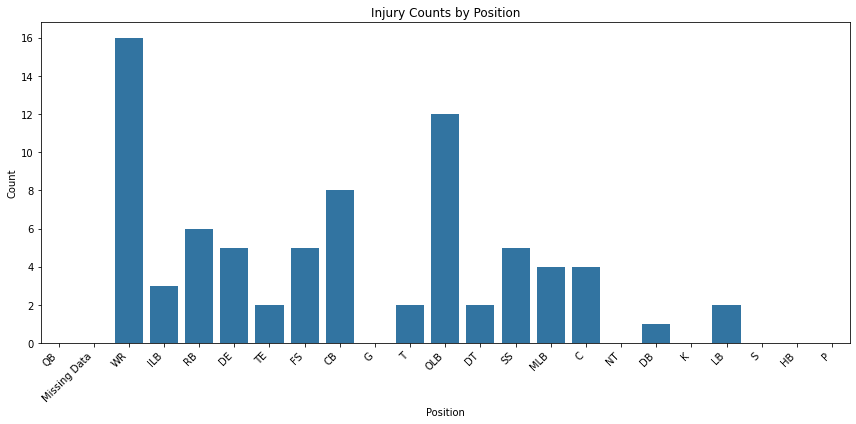

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'injured' is your DataFrame
position_counts = injured["Position"].value_counts()
position_counts.columns = ['Position', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Position', y='Count', data=position_counts)

# Customize the plot
plt.title("Injury Counts by Position")
plt.xlabel("Position")
plt.ylabel("Count")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()



The positions can be grouped a bit more to provide a little more diversity.

- Offensive Skill and Line: WR, RB, TE, T, C
- Linebackers and Line: LB, ILB, MLB, OLB, DE, DT
- Defensive Backs: CB, FS, SS, DB

In [44]:
df = df.with_columns([
    pl.when(pl.col("Position").cast(pl.Utf8).is_in(["WR", "RB", "TE", "T", "C"]))
    .then(pl.lit("Offensive"))
    .when(pl.col("Position").cast(pl.Utf8).is_in(["ILB", "OLB", "MLB", "LB", "DE", "DT"]))
    .then(pl.lit("Linebackers"))
    .when(pl.col("Position").cast(pl.Utf8).is_in(["CB", "FS", "SS", "DB"]))
    .then(pl.lit("DefensiveBacks"))
    .otherwise(pl.lit("Other"))
    .alias("PositionGroup")
])

In [45]:
len(df)

266594

In [46]:
injured = df.filter(pl.col("IsInjured")==1)

In [47]:
injured.head()

PlayKey,Position,StadiumType,FieldType,Temperature,Weather,PlayType,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,IsInjured,IsSevere,Position_right,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque,PositionGroup
str,cat,cat,cat,i16,cat,cat,cat,i8,i8,i8,i8,i8,i8,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str
"""39678-2-1""","""DE""","""Outdoor""","""Synthetic""",78,"""Clear""","""Rush""","""Ankle""",1,1,1,1,1,1,"""DE""",9.616361,2.166752,7.449609,179.910004,98.855545,3.052885,0.437107,216.689056,23.874905,230.65123,-0.019337,157.73703,-0.022281,"""Linebackers"""
"""43505-2-49""","""C""","""Outdoor""","""Natural""",68,"""Cloudy""","""Pass""","""Foot""",1,1,1,1,1,1,"""C""",22.718946,12.360404,10.358542,178.800003,65.700806,5.232599,0.690545,378.39856,45.375923,259.565796,-0.022589,181.630371,-0.015812,"""Offensive"""
"""46331-4-44""","""SS""","""Outdoor""","""Synthetic""",61,"""Clear""","""Pass""","""Ankle""",1,1,1,1,1,1,"""SS""",39.425259,24.22731,15.197948,179.220001,79.266243,6.702966,1.388214,176.829742,23.55695,193.944458,0.000342,126.642754,0.007199,"""DefensiveBacks"""
"""39956-2-14""","""FS""","""Outdoor""","""Natural""",68,"""Cloudy""","""Pass""","""Knee""",1,1,0,0,1,0,"""FS""",49.258183,33.457523,15.800659,179.570007,70.516983,7.615777,1.740573,258.932281,34.283123,184.469879,0.00249,128.106674,-0.00408,"""DefensiveBacks"""
"""42348-23-53""","""OLB""","""Outdoor""","""Synthetic""",46,"""Cloudy""","""Rush""","""Knee""",1,1,1,0,1,1,"""OLB""",25.910782,13.703678,12.207104,179.809998,67.752289,6.135129,0.822565,82.935753,16.518072,206.246277,0.023609,142.762573,0.021859,"""Linebackers"""


In [36]:
position_filter = df.filter(pl.col("PositionGroup") != "Other")

In [37]:
len(position_filter)

238225

Next I want to look at the play types associated with the injuries

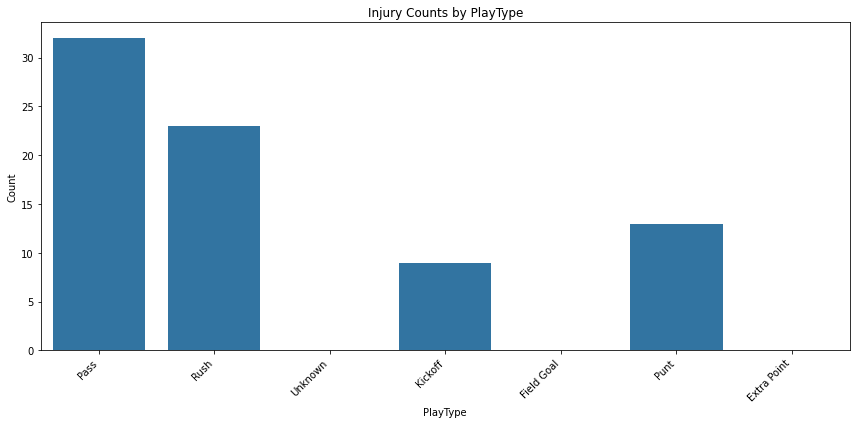

In [38]:
play_counts = injured["PlayType"].value_counts()# Assuming 'injured' is your DataFrame

play_counts.columns = ['PlayType', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='PlayType', y='Count', data=play_counts)

# Customize the plot
plt.title("Injury Counts by PlayType")
plt.xlabel("PlayType")
plt.ylabel("Count")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

So here we can get rid of any of the Unknown, Field Goal and Extra Point plays

In [39]:
play_filter = position_filter.filter(pl.col("PlayType").is_in(["Pass", "Rush", "Kickoff", "Punt"]))

In [41]:
len(play_filter)

228781

I want to see the distribution of the injured players within their PositionGroup and PlayTypes. From here I can find other similar combinations to use for the machine learning with the mechanics. It's not exactly fair to compare Field Goal impact plays with Rushing Plays... 

In [59]:
# Get unique combinations of PositionGroup and PlayType
unique_combinations = injured.select(["PositionGroup", "PlayType"]).unique()

# Count occurrences of each combination
counts = injured.select(["PositionGroup", "PlayType"]).group_by(["PositionGroup", "PlayType"]).agg(pl.count().alias("count"))

# Calculate total injuries
total_injuries = injured.shape[0]

# Calculate percentages
distribution = counts.with_columns([
    (pl.col("count") / total_injuries * 100).alias("percentage")
])

# Sort by count in descending order
distribution = distribution.sort("count", descending=True)

print(distribution)

shape: (12, 4)
┌────────────────┬──────────┬───────┬────────────┐
│ PositionGroup  ┆ PlayType ┆ count ┆ percentage │
│ ---            ┆ ---      ┆ ---   ┆ ---        │
│ str            ┆ cat      ┆ u32   ┆ f64        │
╞════════════════╪══════════╪═══════╪════════════╡
│ Offensive      ┆ Pass     ┆ 14    ┆ 18.181818  │
│ DefensiveBacks ┆ Pass     ┆ 12    ┆ 15.584416  │
│ Linebackers    ┆ Rush     ┆ 12    ┆ 15.584416  │
│ Offensive      ┆ Rush     ┆ 9     ┆ 11.688312  │
│ Linebackers    ┆ Punt     ┆ 7     ┆ 9.090909   │
│ …              ┆ …        ┆ …     ┆ …          │
│ DefensiveBacks ┆ Punt     ┆ 4     ┆ 5.194805   │
│ Linebackers    ┆ Kickoff  ┆ 3     ┆ 3.896104   │
│ DefensiveBacks ┆ Rush     ┆ 2     ┆ 2.597403   │
│ Offensive      ┆ Punt     ┆ 2     ┆ 2.597403   │
│ DefensiveBacks ┆ Kickoff  ┆ 1     ┆ 1.298701   │
└────────────────┴──────────┴───────┴────────────┘


C:\Users\justi\AppData\Local\Temp\ipykernel_27360\1472262086.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  counts = injured.select(["PositionGroup", "PlayType"]).group_by(["PositionGroup", "PlayType"]).agg(pl.count().alias("count"))


In [60]:
print(pl.__version__)

1.2.1


C:\Users\justi\AppData\Local\Temp\ipykernel_27360\2939303371.py:8: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))


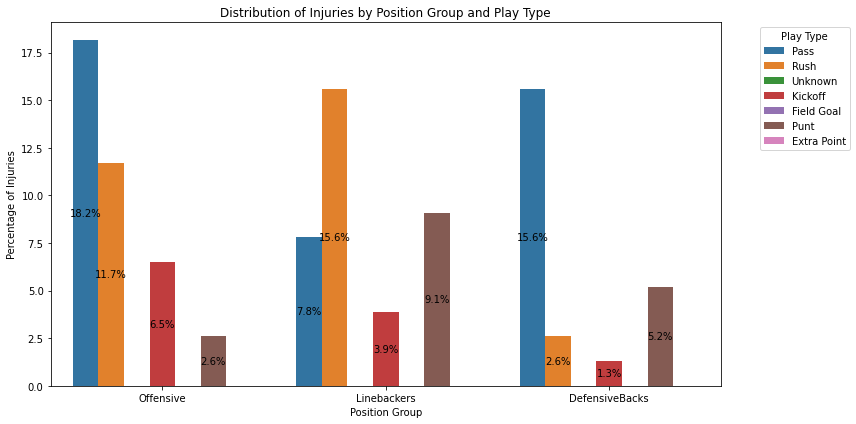

In [62]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Get distribution of PositionGroup and PlayType combinations
distribution = (
    injured.group_by(["PositionGroup", "PlayType"])
    .agg(pl.count().alias("count"))
    .with_columns([
        (pl.col("count") / pl.sum("count") * 100).alias("percentage")
    ])
    .sort("count", descending=True)
)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=distribution,
    x="PositionGroup",
    y="percentage",
    hue="PlayType"
)

# Customize the plot
plt.title('Distribution of Injuries by Position Group and Play Type')
plt.xlabel('Position Group')
plt.ylabel('Percentage of Injuries')
plt.legend(title='Play Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()


So the Play-PositionGroup combinations are as follows: 
- Offensive_Pass
- Offensive_Rush
- Offensive_Kickoff
- Offensive_Punt
- Linebacker_Pass
- Linebacker_Rush
- Linebacker_Kickoff
- Linebacker_Punt
- Defensive_Pass
- Defensive_Rush
- Defensive_Kickoff
- Defensive_Punt

In [63]:
df.head()

PlayKey,Position,StadiumType,FieldType,Temperature,Weather,PlayType,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,IsInjured,IsSevere,Position_right,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque,PositionGroup
str,cat,cat,cat,i16,cat,cat,cat,i8,i8,i8,i8,i8,i8,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str
"""26624-1-20""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Rush""","""No_Injury""",0,0,0,0,0,0,"""QB""",12.560955,5.40202,7.158936,178.440002,78.945656,3.712159,0.483114,187.427231,13.7315,38.490417,-0.010563,72.574364,-0.004217,"""Other"""
"""26624-1-22""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Pass""","""No_Injury""",0,0,0,0,0,0,"""QB""",27.687366,7.580832,20.106533,179.25,101.294319,4.517752,1.936179,72.198616,17.693897,195.079529,0.01526,136.597397,-0.015356,"""Other"""
"""26624-1-23""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Rush""","""No_Injury""",0,0,0,0,0,0,"""QB""",28.736702,8.434956,20.301746,178.229996,78.788918,4.414752,1.037426,240.314255,15.576145,197.972412,0.05488,135.239807,-0.031697,"""Other"""
"""26624-1-24""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Unknown""","""No_Injury""",0,0,0,0,0,0,"""QB""",25.678587,3.967429,21.711157,178.919998,89.392487,4.60975,0.850284,94.129692,14.66524,196.742706,0.067654,136.555679,-0.02783,"""Other"""
"""26624-1-45""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Pass""","""No_Injury""",0,0,0,0,0,0,"""QB""",24.427948,10.659006,13.768942,179.690002,94.147797,4.019967,0.592911,240.312332,11.786748,195.729614,0.003361,135.342194,-0.00585,"""Other"""


In [64]:
df = df.with_columns([
    (pl.col("PositionGroup") + "_" + pl.col("PlayType")).alias("Position_Play")
])

In [65]:
df.head()

PlayKey,Position,StadiumType,FieldType,Temperature,Weather,PlayType,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,IsInjured,IsSevere,Position_right,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque,PositionGroup,Position_Play
str,cat,cat,cat,i16,cat,cat,cat,i8,i8,i8,i8,i8,i8,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str
"""26624-1-20""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Rush""","""No_Injury""",0,0,0,0,0,0,"""QB""",12.560955,5.40202,7.158936,178.440002,78.945656,3.712159,0.483114,187.427231,13.7315,38.490417,-0.010563,72.574364,-0.004217,"""Other""","""Other_Rush"""
"""26624-1-22""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Pass""","""No_Injury""",0,0,0,0,0,0,"""QB""",27.687366,7.580832,20.106533,179.25,101.294319,4.517752,1.936179,72.198616,17.693897,195.079529,0.01526,136.597397,-0.015356,"""Other""","""Other_Pass"""
"""26624-1-23""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Rush""","""No_Injury""",0,0,0,0,0,0,"""QB""",28.736702,8.434956,20.301746,178.229996,78.788918,4.414752,1.037426,240.314255,15.576145,197.972412,0.05488,135.239807,-0.031697,"""Other""","""Other_Rush"""
"""26624-1-24""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Unknown""","""No_Injury""",0,0,0,0,0,0,"""QB""",25.678587,3.967429,21.711157,178.919998,89.392487,4.60975,0.850284,94.129692,14.66524,196.742706,0.067654,136.555679,-0.02783,"""Other""","""Other_Unknown"""
"""26624-1-45""","""QB""","""Outdoor""","""Synthetic""",63,"""Clear""","""Pass""","""No_Injury""",0,0,0,0,0,0,"""QB""",24.427948,10.659006,13.768942,179.690002,94.147797,4.019967,0.592911,240.312332,11.786748,195.729614,0.003361,135.342194,-0.00585,"""Other""","""Other_Pass"""


## DF Processing

1. Remove unnecessary columns
2. Group the Positions based on injured plays
3. Remove PlayTypes that aren't associated with injuries
4. Create PositionGroup_PlayType categories
5. Filter full df for only the 12 combinations that are present in the injury sets
6. Change the StadiumType and FieldType to Indoor and Synthetic, using binary with 1 is True

In [70]:
import polars as pl
pl.enable_string_cache()
import os

path = "F:/Data/Processing_data/"
file = "Full_Summary_Injuries.parquet"

df = pl.read_parquet(os.path.join(path, file))

In [71]:
df = df.drop(['DM_M1'
              , 'DM_M7'
              , 'DM_M28'
              , 'DM_M42'
              , 'Position_right'
              ])

In [72]:
df = df.with_columns([
    pl.when(pl.col("Position").cast(pl.Utf8).is_in(["WR", "RB", "TE", "T", "C"]))
    .then(pl.lit("Offensive"))
    .when(pl.col("Position").cast(pl.Utf8).is_in(["ILB", "OLB", "MLB", "LB", "DE", "DT"]))
    .then(pl.lit("Linebackers"))
    .when(pl.col("Position").cast(pl.Utf8).is_in(["CB", "FS", "SS", "DB"]))
    .then(pl.lit("Defensive"))
    .otherwise(pl.lit("Other"))
    .alias("PositionGroup")
])

In [73]:
df = df.filter(pl.col("PositionGroup") != "Other")

In [74]:
df = df.filter(pl.col("PlayType").is_in(["Pass", "Rush", "Kickoff", "Punt"]))

In [75]:
df = df.with_columns([
    pl.when(pl.col("PlayType").cast(pl.Utf8).is_in(["Kickoff", "Punt"]))
    .then(pl.lit("Special"))
    .otherwise(pl.col("PlayType"))
    .alias("PlayType")
])

In [77]:
df = df.with_columns([
    (pl.col("PositionGroup") + "_" + pl.col("PlayType")).alias("Position_Play")
])

In [78]:
df = df.with_columns([
    (pl.when(pl.col("StadiumType").cast(pl.Utf8)=='Outdoor'))
    .then(0)
    .otherwise(1)
    .alias("Indoor")
])

In [79]:
df = df.with_columns([
    (pl.when(pl.col("FieldType").cast(pl.Utf8)=='Natural'))
    .then(0)
    .otherwise(1)
    .alias("Synthetic")
])

In [80]:
df = df.drop(['Position'
         , 'StadiumType'
         , 'FieldType'
         , 'Temperature'
         , 'Weather'
         , 'PlayType'
         , 'BodyPart'
         , 'PositionGroup'  
         ])

In [81]:
df.head()

PlayKey,IsInjured,IsSevere,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque,Position_Play,Indoor,Synthetic
str,i8,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,i32,i32
"""30068-1-25""",0,0,28.427792,12.041934,16.385857,172.470001,100.926498,7.269125,2.137429,219.18515,20.37035,173.018784,0.023625,121.237793,-0.004875,"""Offensive_Pass""",1,1
"""30068-1-42""",0,0,5.179273,2.164002,3.015271,151.539993,97.440117,3.088649,0.562964,190.681625,17.882877,172.470169,0.039611,121.359085,-0.015881,"""Offensive_Pass""",1,1
"""30068-10-18""",0,0,33.778072,2.897947,30.880125,179.869995,87.820358,5.3,0.908013,208.80658,13.575568,173.57222,0.000791,121.09967,-0.007028,"""Offensive_Rush""",1,1
"""30068-10-24""",0,0,64.088623,25.653896,38.434727,176.080002,67.629913,5.346016,2.04104,209.400131,18.095734,174.409561,0.003521,124.266289,-0.000614,"""Offensive_Rush""",1,1
"""30068-10-33""",0,0,85.26384,11.746697,73.517143,179.899994,87.498108,6.511548,1.425816,174.230301,16.589582,173.177567,0.288959,119.570267,0.201594,"""Offensive_Pass""",1,1


When i perform the analyses, I can use GroupBy(Position_Play) to compare similar plays with those that led to injuries. This should reduce some of the confusion from the massive information fed into the model

In [82]:
# First, let's get all unique Position_Play combinations
unique_position_plays = df["Position_Play"].unique().to_list()

# create a dictionary to store the subsets
subsets = {}

# Create a subset for each unique Position_Play combination
for position_play in unique_position_plays:
    subset = df.filter(pl.col("Position_Play") == position_play)
    subsets[position_play] = subset


In [83]:
unique_position_plays

['Offensive_Pass',
 'Defensive_Special',
 'Defensive_Pass',
 'Linebackers_Special',
 'Linebackers_Pass',
 'Offensive_Special',
 'Defensive_Rush',
 'Linebackers_Rush',
 'Offensive_Rush']

In [84]:
Defensive_Pass = subsets['Defensive_Pass']
Defensive_Rush = subsets['Defensive_Rush']
Defensive_Special = subsets['Defensive_Special']

Linebackers_Pass = subsets['Linebackers_Pass']
Linebackers_Rush = subsets['Linebackers_Rush']
Linebackers_Special = subsets['Linebackers_Special'] 

Offensive_Pass = subsets['Offensive_Pass']
Offensive_Rush = subsets['Offensive_Rush']
Offensive_Special = subsets['Offensive_Special']


In [96]:
Linebackers_Special.filter(pl.col('IsInjured')==1)

PlayKey,IsInjured,IsSevere,Distance,Displacement,Path_Diff,Max_Angle_Diff,Mean_Angle_Diff,Max_Speed,Mean_Speed,Max_Impulse,Mean_Impulse,Max_Torque,Mean_Torque,Max_Int_Torque,Mean_Int_Torque,Position_Play,Indoor,Synthetic
str,i8,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,i32,i32
"""46119-3-16""",1,0,74.910439,32.67347,42.236969,171.990005,106.078064,9.642087,3.108318,124.163025,31.488531,209.337585,0.012086,145.488708,-0.000977,"""Linebackers_Special""",0,0
"""46646-3-30""",1,0,59.435135,45.062302,14.372833,179.259995,94.151108,7.582214,2.386954,233.34407,31.0688,225.150421,-0.008661,145.01355,-0.00173,"""Linebackers_Special""",0,0
"""39873-4-32""",1,1,71.361717,43.036427,28.325291,179.820007,99.830589,9.302167,1.618181,220.506653,25.357513,209.135315,-0.000026,141.38736,-0.000101,"""Linebackers_Special""",1,1
"""38228-1-4""",1,0,81.883148,54.567238,27.31591,179.809998,96.006531,9.394164,0.768852,220.275787,17.138376,220.317749,-0.000077,146.414932,-0.000311,"""Linebackers_Special""",0,1
"""42600-3-1""",1,1,59.18924,46.555523,12.633717,179.880005,91.398102,9.798444,3.288293,224.506927,38.363201,183.688232,-0.012557,144.182266,0.003073,"""Linebackers_Special""",0,0
"""44900-7-10""",1,0,59.867851,48.916107,10.951744,175.880005,90.272408,9.141666,1.819691,338.472931,29.207508,313.868103,0.680241,158.290588,0.471759,"""Linebackers_Special""",0,0
"""46074-7-26""",1,0,46.861454,40.682541,6.178913,178.899994,101.713501,7.494655,2.110877,200.802673,20.89241,208.228165,-0.010824,145.504898,0.00959,"""Linebackers_Special""",0,0
"""46430-8-6""",1,0,70.709282,48.670052,22.03923,178.639999,95.579872,7.39793,2.719587,170.470688,24.23781,216.628021,-0.003903,150.346573,-0.007464,"""Linebackers_Special""",0,0
"""42637-3-6""",1,1,53.250755,43.1996,10.051155,164.639999,83.9207,8.702289,2.8175,207.195038,20.720943,207.985474,-0.011003,143.86676,0.001377,"""Linebackers_Special""",0,0


From here, each of the 9 subsets are ready for Machine Learning. I will definitely need to do over and undersampling in addition to boosting. There isn't much sense in using Defensive Rushing plays with only 2, adn even the 5 Defensive special plays will be difficult to predict.

In [108]:
print(f"Linebackers have {len(Linebackers_Pass.filter(pl.col('IsInjured')==1))} Passing plays, \
{len(Linebackers_Rush.filter(pl.col('IsInjured')==1))} Rushing Plays, and \
{len(Linebackers_Special.filter(pl.col('IsInjured')==1))} Special Plays.")

Linebackers have 6 Passing plays, 12 Rushing Plays, and 10 Special Plays.


In [109]:
print(f"Defense has {len(Defensive_Pass.filter(pl.col('IsInjured')==1))} Passing plays, \
{len(Defensive_Rush.filter(pl.col('IsInjured')==1))} Rushing Plays, and \
{len(Defensive_Special.filter(pl.col('IsInjured')==1))} Special Plays.")

Defense has 12 Passing plays, 2 Rushing Plays, and 5 Special Plays.


In [110]:
print(f"Offense has {len(Offensive_Pass.filter(pl.col('IsInjured')==1))} Passing plays, \
{len(Offensive_Rush.filter(pl.col('IsInjured')==1))} Rushing Plays, and \
{len(Offensive_Special.filter(pl.col('IsInjured')==1))} Special Plays.")

Offense has 14 Passing plays, 9 Rushing Plays, and 7 Special Plays.


What I'm hoping to do by separating these is allow for less error in sampling, since all of the sampled plays from undersampling the major set will all be associated with the same types of plays. Oversampling the minor set will be necessary due to the small numbers, even in the largest set with 14. 